In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../data/merged_data.csv')

In [3]:
df.head()

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,0


In [5]:
id_a = '06w9JimcZu16KyO3WXR459'
id_b = '6XzyAQs2jU4PMWmnFlEQLW'

track_a = df[df['track_id'] == id_a]
track_b = df[df['track_id'] == id_b]

artist_a = track_a['artist_name'].values[0]
artist_b = track_b['artist_name'].values[0]

name_a = track_a['track_name'].values[0]
name_b = track_b['track_name'].values[0]

label_a = f'{artist_a} - {name_a}'[:30]
label_b = f'{artist_b} - {name_b}'[:30]

In [6]:
track_df = pd.concat([track_a, track_b]).drop(columns=['duration_ms', 'popularity'])

In [7]:
vis_labels = [label_a, label_b]

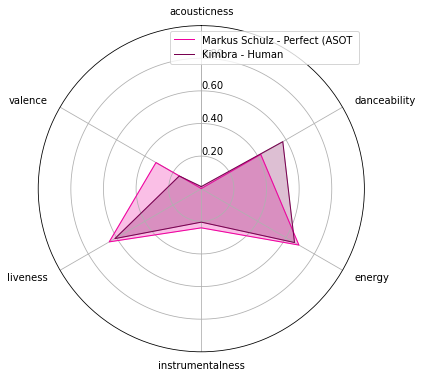

In [8]:
labels = [
    'acousticness',
    'danceability',
    'energy',
    'instrumentalness',
    'liveness',
    'valence'
]

num_vals = len(labels)
angles = [n / float(num_vals) * 2 * np.pi for n in range(num_vals)]
angles += angles[:1]  # make cyclic to connect vertices in polygon

# Set figure settings
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles), labels)
ax.set_rlabel_position(0)
ax.set_yticks([0.20, 0.40, 0.60, 0.80])
ax.set_yticklabels(['0.20', '0.40', '0.60', '0.80'])
ax.set_ylim(0, 1)

# Plot and fill the radar polygons
feature_df = track_df[labels].reset_index().drop(columns=['index'])
colors = ['#EF019F', '#780150']
for i, color in enumerate(colors):
    values = feature_df.loc[i].values.flatten().tolist()
    values += values[:1]  # make cyclic to connect vertices in polygon
    ax.plot(
        angles,
        values,
        color=color,
        linewidth=1,
        linestyle='solid',
        label=vis_labels[i]
    )
    ax.fill(angles, values, color=color, alpha=0.25)

    # Set feature labels so they don't overlap the chart
    for label, angle in zip(ax.get_xticklabels(), angles):
        if angle in [0, np.pi]:
            label.set_horizontalalignment('center')
        elif 0 < angle < np.pi:
            label.set_horizontalalignment('left')
        else:
            label.set_horizontalalignment('right')
ax.legend(loc='best')
plt.show()